In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [2]:
images_dir = os.path.join(os.getcwd(), "Images")  

#przeskalowanie zdjęć z podziełem na tstowe i treningowe dzięki bibliotece ImageDataGenerator
data = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


In [3]:
#dane treningowe
train_images = data.flow_from_directory(
    images_dir,
    target_size=(224,224),
    batch_size=64,
    subset='training',
    class_mode='categorical'
)

Found 16508 images belonging to 120 classes.


In [4]:
#dane testowe
test_images = data.flow_from_directory(
    images_dir,
    target_size=(224,224),
    batch_size=64,
    subset='validation',
    class_mode='categorical'
)



Found 4072 images belonging to 120 classes.


In [5]:
ile_clas = len(train_images.class_indices)
print(ile_clas)

120


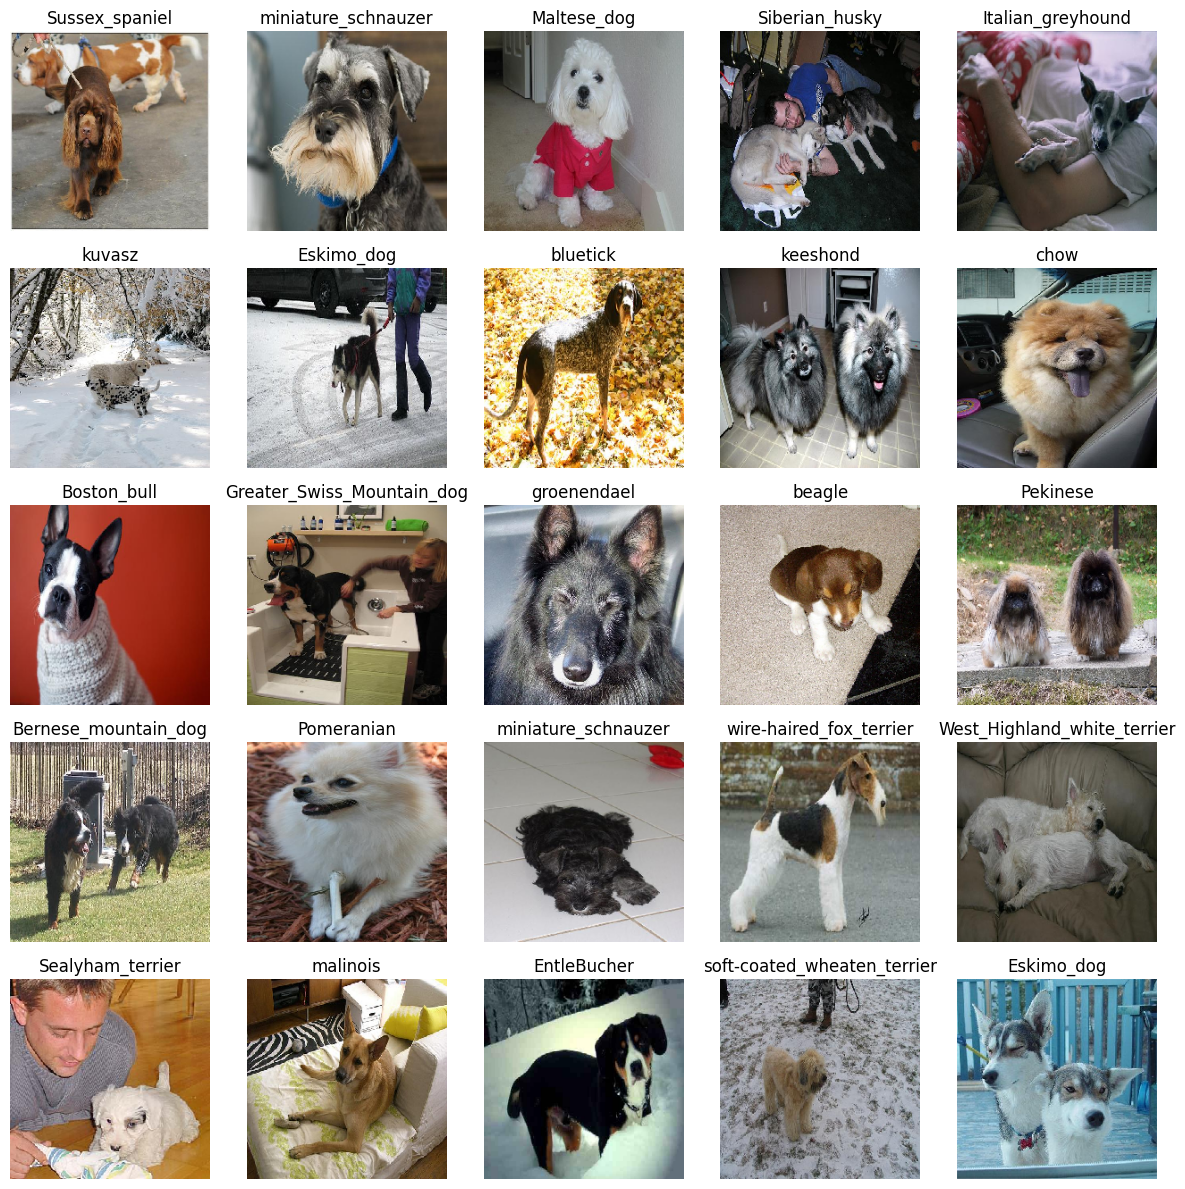

In [6]:

plt.figure(figsize=(12, 12))

images, labels = next(train_images)

raw_class_names = {v: k for k, v in
train_images.class_indices.items()}

class_names = {i: name[10:] for i, name in raw_class_names.items()}

for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])  
        plt.axis("off")
        class_index = np.argmax(labels[i])
        class_label = class_names[class_index]
        ax.set_title(class_label)

plt.tight_layout()
plt.show()

In [7]:
model = tf.keras.Sequential([
    # 1. Blok 1
    tf.keras.layers.Conv2D(32, (7, 7), activation='relu', padding='same', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    # 2. Blok 2
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # 3. Blok 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # 4. Spłaszczanie i gęste warstwy
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(ile_clas, activation='softmax')
])


model.summary()

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        30,840 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,851,064 (98.61 MB)

 Trainable params: 25,851,064 (98.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=6
    )

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.0104 - loss: 4.9530 - val_accuracy: 0.0123 - val_loss: 4.7841
Epoch 2/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.0115 - loss: 4.7838 - val_accuracy: 0.0123 - val_loss: 4.7812
Epoch 3/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.0112 - loss: 4.7829 - val_accuracy: 0.0123 - val_loss: 4.7798
Epoch 4/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.0118 - loss: 4.7896 - val_accuracy: 0.0120 - val_loss: 4.7793
Epoch 5/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.0133 - loss: 4.7742 - val_accuracy: 0.0194 - val_loss: 4.7361
Epoch 6/6
258/258 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.0244 - loss: 4.6845 - val_accuracy: 0.0250 - val_loss: 4.6831


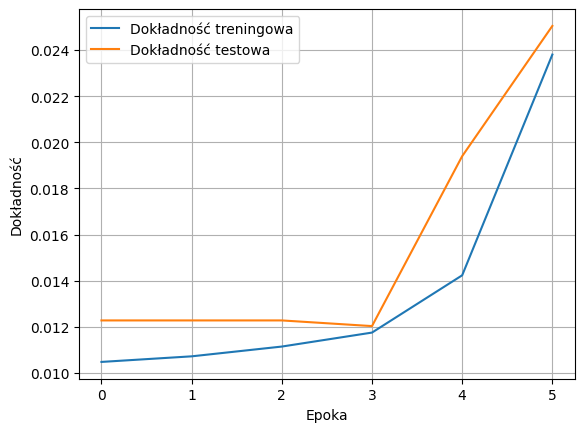

In [10]:
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność testowa')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


ValueError: num must be an integer with 1 <= num <= 10, not 11

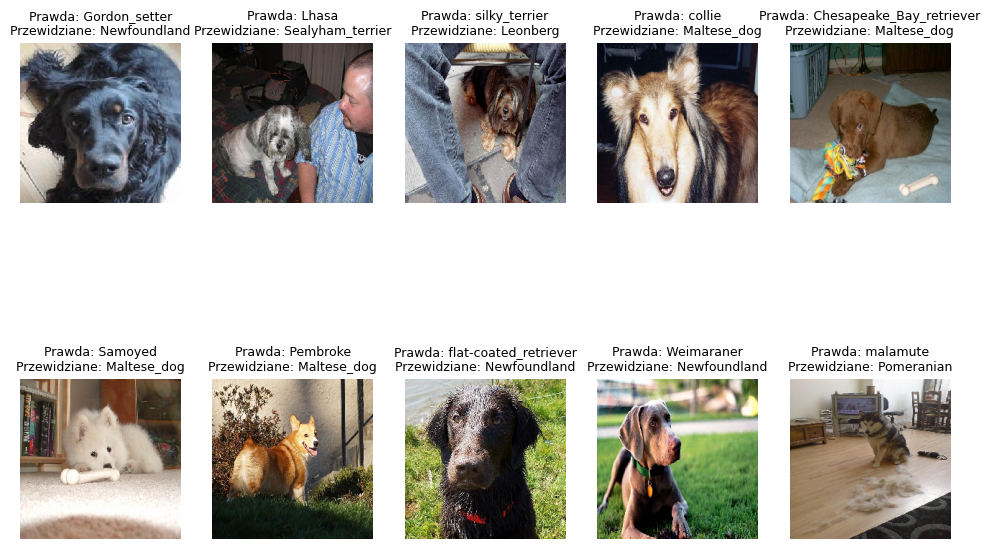

In [ ]:
test_images.reset()
images, labels = next(test_images)

# Predykcja
preds = model.predict(images)
predicted_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(labels, axis=1)

# Pokaż 10 wyników
plt.figure(figsize=(12, 8))
for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    true_label = class_names[true_classes[i]]
    pred_label = class_names[predicted_classes[i]]
    ax.set_title(f"Prawda: {true_label}\nPrzewidziane: {pred_label}", fontsize=9)

plt.tight_layout()
plt.show()